1. Préparation du Dataset

In [53]:
import pandas as pd
import numpy as np

# j'ai commenté car j'ai déja les colonnes dans le fichier csv
# df = pd.DataFrame({
#     'surface': np.random.randint(30, 200, 50),  # surface en m²
#     'nbRooms': np.random.randint(1, 6, 50),     # nombre de chambres
#     'price': np.random.randint(100000, 1000000, 50)  # prix de l'appartement
# })

# # Ajout des nouvelles colonnes
# df['annee'] = np.random.randint(2005, 2025, df.shape[0])  # années entre 2005 et 2024
# df['balcon'] = np.random.choice([True, False], df.shape[0])  # booléen pour balcon
# df['garage'] = np.random.choice([True, False], df.shape[0])  # booléen pour garage
# df['note'] = np.random.randint(1, 6, df.shape[0])  # note de 1 à 5

df = pd.read_csv('appartements.csv')

# Catégorisation du prix
def categorize_price(price):
    if price < 200000:
        return 'low'
    elif 200000 <= price < 500000:
        return 'normal'
    elif 500000 <= price < 800000:
        return 'high'
    else:
        return 'scam'

df['price_category'] = df['price'].apply(categorize_price)

df.head()


,nbRooms,surface,nbWindows,price,id,year,balcony,garage,note,price_category,city
0,4,57,8,202956,6,2011,True,False,2,normal,Paris
1,5,46,6,148352,7,2024,False,False,1,low,Lyon
2,3,102,8,337699,8,2019,False,True,4,normal,Marseille
3,5,101,9,347944,9,2015,False,False,4,normal,Paris
4,5,41,4,155493,10,2012,True,True,1,low,Lyon


3. Analyse des données avec Numpy et Pandas

In [26]:
# Moyenne, écart-type, surface minimale et maximale
surface_mean = df['surface'].mean()
surface_std = df['surface'].std()
surface_min = df['surface'].min()
surface_max = df['surface'].max()

# Année de construction: Moyenne, la plus ancienne, la plus récente
annee_mean = df['year'].mean()
annee_min = df['year'].min()
annee_max = df['year'].max()

# Proportion d'appartements avec balcon
balcon_proportion = df['balcony'].mean()

# Comptage du nombre d'appartements dans chaque catégorie de prix
price_category_counts = df['price_category'].value_counts()

# Nombre de chambres: Moyenne, médiane, variance, écart-type
nbRooms_mean = df['nbRooms'].mean()
nbRooms_median = df['nbRooms'].median()
nbRooms_variance = df['nbRooms'].var()
nbRooms_std = df['nbRooms'].std()

# Affichage des résultats
print(f"Surface - Moyenne: {surface_mean}, Ecart-type: {surface_std}, Min: {surface_min}, Max: {surface_max}")
print(f"Année de construction - Moyenne: {annee_mean}, Ancien: {annee_min}, Récent: {annee_max}")
print(f"Proportion d'appartements avec balcon: {balcon_proportion}")
print(f"Nombre d'appartements par catégorie de prix:\n{price_category_counts}")
print(f"Nombre de chambres - Moyenne: {nbRooms_mean}, Médiane: {nbRooms_median}, Variance: {nbRooms_variance}, Ecart-type: {nbRooms_std}")


Surface - Moyenne: 89.25, Ecart-type: 35.78425109266123, Min: 26, Max: 148
Année de construction - Moyenne: 2014.45, Ancien: 2005, Récent: 2024
Proportion d'appartements avec balcon: 0.45
Nombre d'appartements par catégorie de prix:
price_category
normal    77
low       23
Name: count, dtype: int64
Nombre de chambres - Moyenne: 3.46, Médiane: 4.0, Variance: 1.3216161616161628, Ecart-type: 1.1496156582163288


4. Visualisation avec Matplotlib

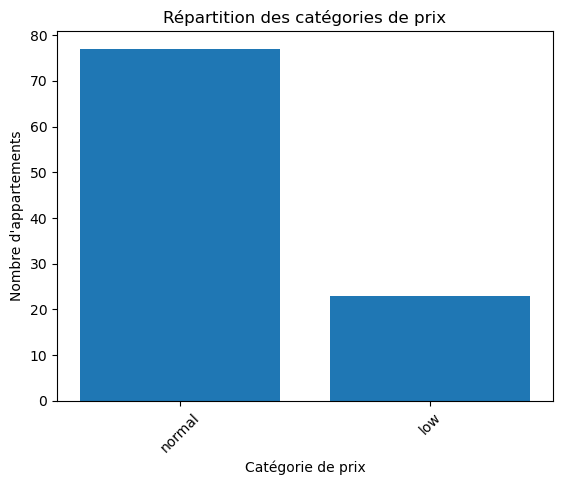

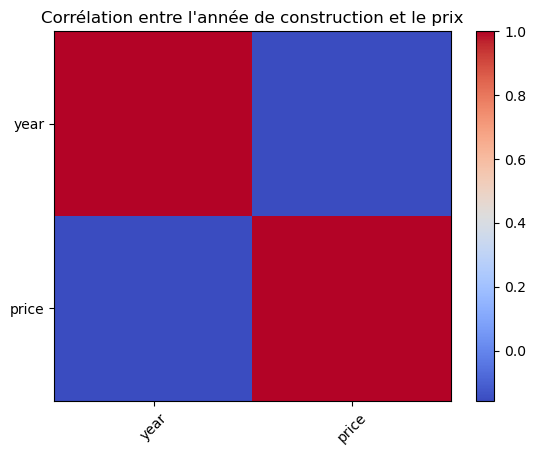

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Diagramme à barres pour la répartition des catégories de prix
price_category_counts = df['price_category'].value_counts()
plt.bar(price_category_counts.index, price_category_counts.values)
plt.title("Répartition des catégories de prix")
plt.xlabel("Catégorie de prix")
plt.ylabel("Nombre d'appartements")
plt.xticks(rotation=45)
plt.show()

# Bonus: Heatmap pour la corrélation entre l'année de construction et le prix
correlation_matrix = df[['year', 'price']].corr()

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Corrélation entre l'année de construction et le prix")
plt.show()



1. Compléter avec une nouvelle colonne ville

In [ ]:
# Ajouter une nouvelle colonne 'city'
# cities = ['Lyon', 'Paris', 'Marseille']
# df['city'] = np.random.choice(cities, size=len(df))


# j'ai commenté car j'ai déja la colonne city dans le fichier csv

2. PRÉDICITON LINÉAIRE SUR LA NOTE

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Préparer les données
X = df[['surface', 'price', 'city']]
y = df['note']

# One-Hot Encoding pour la ville
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[['city']])
X_encoded = np.concatenate((X[['surface', 'price']].values, X_encoded), axis=1)

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Calculer R² et RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Affichage des résultats
print(f"Prédictions : {y_pred}")
print(f"R² : {r2}")
print(f"RMSE : {rmse}")


Prédictions : [2.60881281 2.91075643 2.97874434 2.81949179 3.39382127 3.14378906
 1.85152731 3.33051066 3.12726831 2.85428759 3.0192828  3.32782767
 3.21725322 3.25045787 3.37550507 2.74892031 3.26183355 3.46672668
 2.89596843 2.80949263]
R² : -0.01775611380802289
RMSE : 1.357254053592223


3. PRÉDICTION LINÉAIRE SUR L'ANNÉE

In [45]:
# Préparer les données
X_year = df[['city', 'price']]
y_year = df['year']

# One-Hot Encoding pour la ville
X_year_encoded = encoder.fit_transform(X_year[['city']])
X_year_encoded = np.concatenate((X_year[['price']].values, X_year_encoded), axis=1)

# Séparation des données
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_year_encoded, y_year, test_size=0.2, random_state=42)

# Régression linéaire
model_year = LinearRegression()
model_year.fit(X_train_year, y_train_year)

# Prédictions et évaluation
y_pred_year = model_year.predict(X_test_year)

# Calculer R² et RMSE
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test_year, y_pred_year)
rmse = np.sqrt(mean_squared_error(y_test_year, y_pred_year))

print(f"R²: {r2}, RMSE: {rmse}")


R²: -0.23518701193223102, RMSE: 5.481697915133718


4. CLASSIFICATION LOGISTIQUE POUR LE GARAGE

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

# Préparer les données
X_garage = df[['price', 'city']]
y_garage = df['garage']

# One-Hot Encoding pour la ville
encoder = OneHotEncoder(sparse_output=False)
X_garage_encoded = encoder.fit_transform(X_garage[['city']])
X_garage_encoded = np.concatenate((X_garage[['price']].values, X_garage_encoded), axis=1)

# Séparation des données
X_train_garage, X_test_garage, y_train_garage, y_test_garage = train_test_split(X_garage_encoded, y_garage, test_size=0.2, random_state=42)

# Régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train_garage, y_train_garage)

# Prédictions et évaluation
y_pred_garage = log_reg.predict(X_test_garage)

# Calculer les métriques
accuracy_log = accuracy_score(y_test_garage, y_pred_garage)
recall_log = recall_score(y_test_garage, y_pred_garage)
f1_log = f1_score(y_test_garage, y_pred_garage)

# Affichage des résultats
print(f"Prédictions (garage) : {y_pred_garage}")
print(f"Accuracy : {accuracy_log}")
print(f"Recall : {recall_log}")
print(f"F1 Score : {f1_log}")


Prédictions (garage) : [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Accuracy : 0.55
Recall : 1.0
F1 Score : 0.7096774193548387


5. CLASSIFICATION KNN POUR LE BALCON

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

# Préparer les données
X_balcony = df[['price', 'city']]
y_balcony = df['balcony']

# One-Hot Encoding pour la ville
encoder = OneHotEncoder(sparse_output=False)
X_balcony_encoded = encoder.fit_transform(X_balcony[['city']])
X_balcony_encoded = np.concatenate((X_balcony[['price']].values, X_balcony_encoded), axis=1)

# Séparation des données
X_train_balcony, X_test_balcony, y_train_balcony, y_test_balcony = train_test_split(X_balcony_encoded, y_balcony, test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_balcony, y_train_balcony)

# Prédictions et évaluation
y_pred_balcony = knn.predict(X_test_balcony)

# Calculer les métriques
accuracy_knn = accuracy_score(y_test_balcony, y_pred_balcony)
recall_knn = recall_score(y_test_balcony, y_pred_balcony)
f1_knn = f1_score(y_test_balcony, y_pred_balcony)

# Affichage des résultats
print(f"Prédictions (balcon) : {y_pred_balcony}")
print(f"Accuracy : {accuracy_knn}")
print(f"Recall : {recall_knn}")
print(f"F1 Score : {f1_knn}")


Prédictions (balcon) : [False  True False  True False False  True  True False  True  True  True
  True False False False False False  True  True]
Accuracy : 0.4
Recall : 0.3333333333333333
F1 Score : 0.25


6. AFFICHAGE DES ACCURACY

In [50]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Logistique
accuracy_log = accuracy_score(y_test_garage, y_pred_garage)
recall_log = recall_score(y_test_garage, y_pred_garage)
f1_log = f1_score(y_test_garage, y_pred_garage)

# KNN
accuracy_knn = accuracy_score(y_test_balcony, y_pred_balcony)
recall_knn = recall_score(y_test_balcony, y_pred_balcony)
f1_knn = f1_score(y_test_balcony, y_pred_balcony)

print(f"Logistique - Accuracy: {accuracy_log}, Recall: {recall_log}, F1: {f1_log}")
print(f"KNN - Accuracy: {accuracy_knn}, Recall: {recall_knn}, F1: {f1_knn}")


Logistique - Accuracy: 0.55, Recall: 1.0, F1: 0.7096774193548387
KNN - Accuracy: 0.4, Recall: 0.3333333333333333, F1: 0.25
